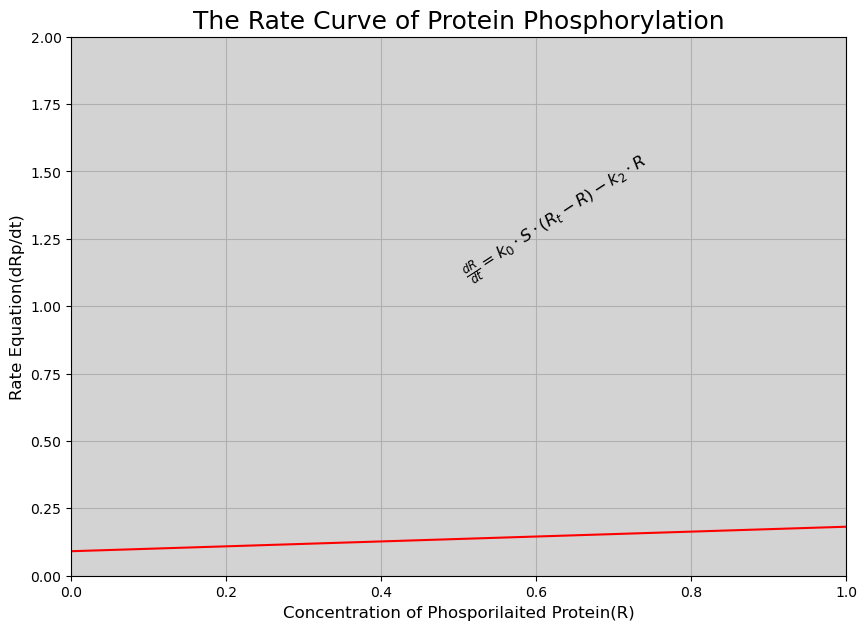

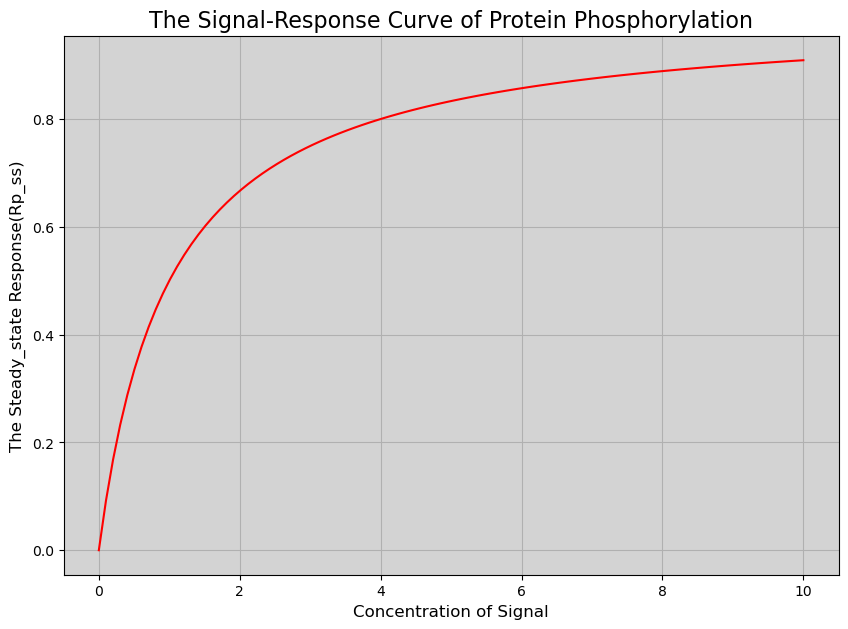

In [2]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rate_equ = """
     k1 = 1; k2 = 1; Rt = 1;Rt = Rp + R; S = 10; R = 1;
     R -> Rp; (k1*S*(Rt-Rp)) - (k2*Rp);
"""
model = te.loada(rate_equ)

result = model.simulate(0,10,100)

time = result[:,0]
R_conc = result[:,1]
Rp_conc = result[:,2]
Rate = (model.k1 * model.S * (model.Rt - Rp_conc)) - (model.k2 * Rp_conc) # The rate equation
S_conc = np.linspace(0,10,100) # the concentration of signal
Rp_ss = (model.Rt * S_conc) / ((model.k2/model.k1) + S_conc) # the steady-state equation

plt.figure(figsize=(10,7))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.plot(Rate,R_conc ,color = 'red')
plt.xlabel('Concentration of Phosporilaited Protein(R)', fontsize=12)
plt.ylabel('Rate Equation(dRp/dt)',fontsize=12)
plt.title('The Rate Curve of Protein Phosphorylation', fontsize = 18)
equation_text = r'$\frac{{dR}}{{dt}} = k_0 \cdot S \cdot (R_t - R) - k_2 \cdot R$'
plt.text(0.5, 0.55, equation_text, transform=plt.gca().transAxes, fontsize=12, rotation=33)
plt.xlim(0,1)
plt.ylim(0,2)
plt.grid(True)
plt.plot()


S_conc = np.linspace(0,10,100) # the concentration of signal
Rp_ss = (model.Rt * S_conc) / ((model.k2/model.k1) + S_conc) # the steady-state equation

plt.figure(figsize=(10,7))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.plot(S_conc, Rp_ss, color='red')
plt.xlabel('Concentration of Signal', fontsize=12)
plt.ylabel('The Steady_state Response(Rp_ss)', fontsize=12)
plt.title('The Signal-Response Curve of Protein Phosphorylation', fontsize=16)

plt.grid(True)
plt.show()

